#Import required libaries

In [4]:
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load and make the data image high resolution



Step 1: Loading the original ECG image
Image loaded successfully.
Image shape: (8268, 11693)
Image data type: uint8
Step 2: Resizing the image to a higher resolution (2x)
Resized image shape: (16536, 23386)
Step 3: Saving the high-resolution image
High-resolution image saved to /content/drive/MyDrive/ECG1/ECG.png
Step 4: Displaying the original and high-resolution images


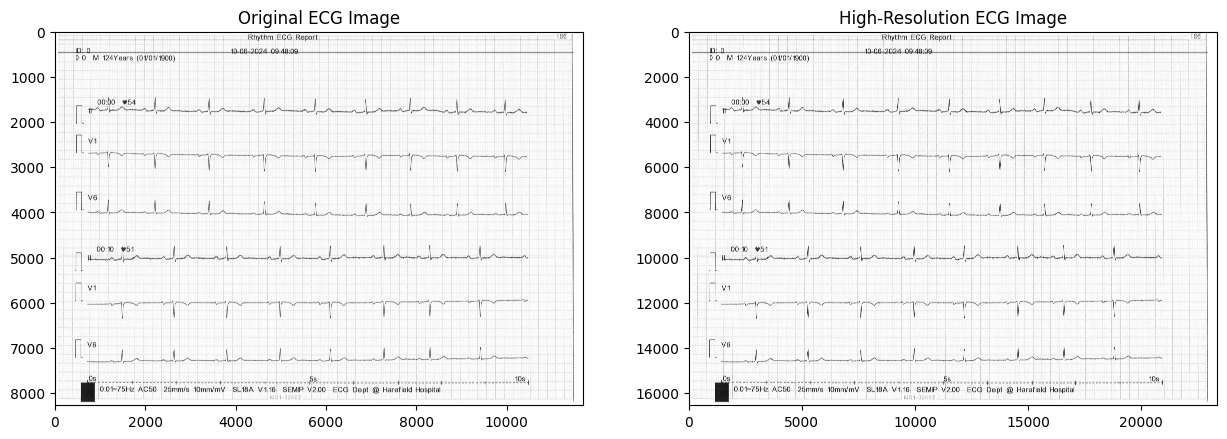

Step 5: Converting the image to numeric values and saving as CSV
ECG numeric values saved to /content/drive/MyDrive/ECG1/CSVconversion.csv
DataFrame of the ECG image:
       0      1      2      3      4      5      6      7      8      9      \
0        255    255    255    255    255    255    255    255    255    255   
1        255    255    255    255    255    255    255    255    255    255   
2        255    255    255    255    255    255    255    255    255    255   
3        255    255    255    255    255    255    255    255    255    255   
4        255    255    255    255    255    255    255    255    255    255   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
16531    255    255    255    255    255    255    255    255    255    255   
16532    255    255    255    255    255    255    255    255    255    255   
16533    255    255    255    255    255    255    255    255    255    255   
16534    255    255    255    255    255   

In [6]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the original ECG image
print("Step 1: Loading the original ECG image")
image_path = '/content/drive/MyDrive/ECG1/ECG1.png'
ecg_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if ecg_image is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")
    print(f"Image shape: {ecg_image.shape}")
    print(f"Image data type: {ecg_image.dtype}")

    # Step 2: Resize the image to a higher resolution (e.g., 2x)
    print("Step 2: Resizing the image to a higher resolution (2x)")
    high_res_image = cv2.resize(ecg_image, (ecg_image.shape[1] * 2, ecg_image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)
    print(f"Resized image shape: {high_res_image.shape}")

    # Step 3: Save the high-resolution image
    print("Step 3: Saving the high-resolution image")
    high_res_image_path = '/content/drive/MyDrive/ECG1/ECG.png'
    cv2.imwrite(high_res_image_path, high_res_image)
    print(f"High-resolution image saved to {high_res_image_path}")

    # Step 4: Display the original and high-resolution images
    print("Step 4: Displaying the original and high-resolution images")
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(ecg_image, cmap='gray')
    plt.title('Original ECG Image')

    plt.subplot(1, 2, 2)
    plt.imshow(high_res_image, cmap='gray')
    plt.title('High-Resolution ECG Image')

    plt.show()

    # Step 5: Convert the image to numeric values and save as CSV
    print("Step 5: Converting the image to numeric values and saving as CSV")
    df = pd.DataFrame(high_res_image)
    csv_path = '/content/drive/MyDrive/ECG1/CSVconversion.csv'
    df.to_csv(csv_path, index=False)
    print(f"ECG numeric values saved to {csv_path}")

    # Show the DataFrame
    print("DataFrame of the ECG image:")
    print(df)


#Error detection

Mounted at /content/drive
Step 1: Loading the CSV file
CSV loaded successfully with shape: (16536, 23386)
Reconstructed image shape: (16536, 23386)
Step 2: Loading the high-resolution image
High-resolution image loaded successfully with shape: (16536, 23386)
Resized high-resolution image shape: (16536, 23386)
Step 3: Comparing the original and reconstructed images
Mean Squared Error (MSE) between the images: 0.0
Step 4: Displaying the images


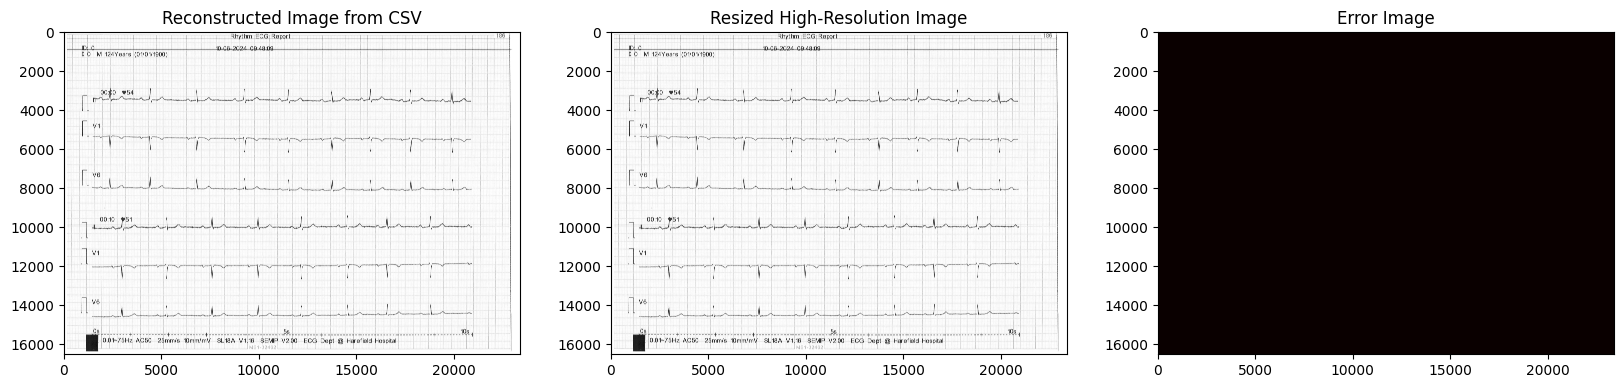

In [7]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 1: Load the CSV file
csv_path = '/content/drive/MyDrive/ECG1/CSVconversion.csv'
print("Step 1: Loading the CSV file")
df = pd.read_csv(csv_path)
print(f"CSV loaded successfully with shape: {df.shape}")

# Convert the DataFrame back to an image
reconstructed_image = df.to_numpy().astype(np.uint8)
print(f"Reconstructed image shape: {reconstructed_image.shape}")

# Step 2: Load the high-resolution image
high_res_image_path = '/content/drive/MyDrive/ECG1/ECG.png'
print("Step 2: Loading the high-resolution image")
high_res_image = cv2.imread(high_res_image_path, cv2.IMREAD_GRAYSCALE)
if high_res_image is None:
    print("Error: Unable to load high-resolution image.")
else:
    print(f"High-resolution image loaded successfully with shape: {high_res_image.shape}")

    # Resize the high-resolution image to the original size
    resized_high_res_image = cv2.resize(high_res_image, (reconstructed_image.shape[1], reconstructed_image.shape[0]), interpolation=cv2.INTER_CUBIC)
    print(f"Resized high-resolution image shape: {resized_high_res_image.shape}")

# Step 3: Compare the original and reconstructed images
print("Step 3: Comparing the original and reconstructed images")

# Ensure both images have the same shape for comparison
if reconstructed_image.shape != resized_high_res_image.shape:
    print("Error: The shapes of the original and reconstructed images do not match even after resizing.")
else:
    # Calculate the Mean Squared Error (MSE) between the images
    mse = np.mean((reconstructed_image - resized_high_res_image) ** 2)
    print(f"Mean Squared Error (MSE) between the images: {mse}")

    # Step 4: Display the original, reconstructed, and difference images
    print("Step 4: Displaying the images")

    plt.figure(figsize=(20, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image from CSV')

    plt.subplot(1, 3, 2)
    plt.imshow(resized_high_res_image, cmap='gray')
    plt.title('Resized High-Resolution Image')

    plt.subplot(1, 3, 3)
    plt.imshow(np.abs(reconstructed_image - resized_high_res_image), cmap='hot')
    plt.title('Error Image')

    plt.show()
